## Introduction

The dataset for wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. Almost always greater than 10. 11/10, 12/10, 13/10, etc. Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.

Wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for the completion of the project.

## Data Wrangling

Data wrangling is comprised of the following three steps:
    <li> Data Gathering
    <li> Data Accessing
    <li> Data Cleaning
    

### Data Gathering

In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer


Data Set 1

In [2]:
#reading the given csv file
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#make sure dataframe is created
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Data Set 2

In [4]:
#creating a response from the given url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [6]:
#writing a file with the response of the url
with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content)

In [7]:
#reading the created file using the delimiter as tab
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [8]:
#second dataframe is created properly by sending requests, and downloading through the web
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Data Set 3

In [ ]:
# query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# these are hidden to comply with Twitter's API terms and conditions

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,  wait_on_rate_limit=True)

In [ ]:
#getting the tweet ids whose information we need to grab from the API
tweet_ids = twitter_archive_enhanced.tweet_id.values
len(tweet_ids)


In [ ]:
#reading through json, and appending columns such as retweet count, favorites and user favorites into a dictionary
df_tweet = []
df_unable_tweet = []
for i in tweet_ids:
    try:
        tweet = api.get_status(i, tweet_mode='extended',wait_on_rate_limit=True,wait_on_rate_limit_notify=True)._json
        retweets = tweet['retweet_count'] 
        favorites = tweet['favorite_count']
        user_favourites = tweet['user']['favourites_count']
        
        df_tweet.append({'tweet_id':int(i),
                         'retweet_count':int(retweets),
                         'favorites':int(favorites),
                         'user_favorites':int(user_favourites)})
    except Exception:
        df_unable_tweet.append(i)

In [ ]:
#creating a dataframe using the created dictionary
df_tweet_info = pd.DataFrame(df_tweet, columns = ['tweet_id','retweet_count','favorites','user_favorites'])

In [ ]:
#storing the information in a text file so that file can be used later
df_tweet_info.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [9]:
#reading the file, and creating tweet_data dataframe from the created txt file in the above step.
tweet_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')

In [11]:
#making sure our final dataframe is working properly
tweet_data.head()

,tweet_id,retweet_count,favorites,user_favorites
0,892420643555336193,7762,36494,144702
1,892177421306343426,5754,31462,144702
2,891815181378084864,3809,23702,144702
3,891689557279858688,7929,39831,144702
4,891327558926688256,8556,38034,144702


This concludes the gathering part of the wrangling. Next step is Data Accessing.

### Data Accessing

In [12]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
twitter_archive_enhanced.text.head()
#on careful visual assessment in google sheets, its seen that the text includes the status doggo, floofer, pupper or puppo.
#Some have multiple, but text has the correct information. 

0    This is Phineas. He's a mystical boy. Only eve...
1    This is Tilly. She's just checking pup on you....
2    This is Archie. He is a rare Norwegian Pouncin...
3    This is Darla. She commenced a snooze mid meal...
4    This is Franklin. He would like you to stop ca...
Name: text, dtype: object

In [14]:
twitter_archive_enhanced.loc[(twitter_archive_enhanced[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) > 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None


Fix the correct status of dogs: <br> <br>
191 - puppo<br>
200 - floofer<br>
460 - pupper<br>
531 - pupper and doogo (multiple)<br>
575 - pupper<br>
705 - doggo<br>
733 - pupper and doggo (multiple)<br>
778 - doggo and pupper (multiple)<br>
822 - pupper and doggo (multiple)<br>
889 - doggo and pupper (multiple)<br>
956 - doggo and pupper (multiple)<br>
1063 - pupper and doggo (multiple)<br>
1113 - pupper and doggo (multiple)

In [15]:
#making sure no duplicate record 
twitter_archive_enhanced.duplicated().sum()

0

In [16]:
#rename columns which are not descriptive like name and 
twitter_archive_enhanced.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
447,819015331746349057,NaN,NaN,2017-01-11 02:57:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sunny. She was also a v...,8.190064e+17,4.196984e+09,2017-01-11 02:21:57 +0000,https://twitter.com/dog_rates/status/819006400...,14,10,Sunny,doggo,None,None,None
1589,686683045143953408,NaN,NaN,2016-01-11 22:56:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mona. She's a Yarborough Splishnsplash...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686683045...,11,10,Mona,None,None,pupper,None
1732,679828447187857408,NaN,NaN,2015-12-24 00:58:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Everybody look at this beautiful pupper 13/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679828447...,13,10,None,None,None,pupper,None
374,828372645993398273,NaN,NaN,2017-02-05 22:40:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alexander Hamilpup. He was one of the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828372645...,12,10,Alexander,None,None,None,None
1757,678764513869611008,NaN,NaN,2015-12-21 02:30:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Wilson. He got caught humping the futon. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678764513...,10,10,Wilson,None,None,None,None
819,770655142660169732,NaN,NaN,2016-08-30 16:11:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770655142...,11,10,very,None,None,None,None
1056,742161199639494656,NaN,NaN,2016-06-13 01:06:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doug. He's trying to float away. 12/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742161199...,12,10,Doug,None,None,None,None
2270,667502640335572993,NaN,NaN,2015-11-20 00:40:05 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Say hello to Hall and Oates. Oates is winking ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667502640...,11,10,Hall,None,None,None,None
578,800751577355128832,NaN,NaN,2016-11-21 17:23:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mauve and Murphy. They're rather ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800751577...,12,10,Mauve,None,None,None,None
1565,688064179421470721,NaN,NaN,2016-01-15 18:24:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He's a Pouncing Brioche. Really ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688064179...,11,10,Kilo,None,None,None,None


In [17]:
to_replace = list(twitter_archive_enhanced[twitter_archive_enhanced.name.str.islower()].name.value_counts().index)
#fixing names of dogs such as a, an, the, by, mad, this, all, etc

In [18]:
#in order to make denominator 10 consistent, remove other records
twitter_archive_enhanced.rating_denominator.value_counts()


10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [19]:
#investigating case by case for numerator of more than 16 for only cases where denominator is 10. 
#Reading the text in google sheets, and change values which are incorrect. 
twitter_archive_enhanced[twitter_archive_enhanced.rating_numerator>16].sort_values('rating_numerator', ascending = False)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None


The following tweet_id have the rating (numerator/denominator)
<li>832215909146226688 is 9.75/10
<li>786709082849828864 is 9.75/10
<li>778027034220126208 is 11.27/10
<li>680494726643068929 is 11.26/10
<li>881633300179243008 is 13/10

In [20]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [21]:
#the most useful information lies with p1, as p2 and p3 have insignificant prediction values
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
#no duplicate record, all unique tweet ids
image_predictions.tweet_id.nunique()

2075

In [23]:
tweet_data.head()

,tweet_id,retweet_count,favorites,user_favorites
0,892420643555336193,7762,36494,144702
1,892177421306343426,5754,31462,144702
2,891815181378084864,3809,23702,144702
3,891689557279858688,7929,39831,144702
4,891327558926688256,8556,38034,144702


In [24]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorites         2331 non-null int64
user_favorites    2331 non-null int64
dtypes: int64(4)
memory usage: 72.9 KB


In [25]:
#no duplicate record, all unique tweet ids
tweet_data.tweet_id.nunique()

2331

In [26]:
#not much information is available, and can be dropped
tweet_data.user_favorites.value_counts()

144702    2321
144703      10
Name: user_favorites, dtype: int64

### Quality Issues

<b>dataframe: twitter_archive_enhanced</b>
<li> Fixing the column names: name of the dog and newly created attribute 'status' (more on status in the tidiness section.) <li> Change data type of status from object to category. 
<li> Dropping columns does not provide any additional information for the analysis and visualization.
<li> Changing the names of the dogs 'a','an','the','all','one','by', and assigning null for them. 
<li> Removing the records where ratings of denominator is not 10. To maintain consistency.
<li> Feature Engineering of a new column 'ratings' which is calculated by diving the denominator ratings (10) by numerator
<li> There are incorrect numerator ratings which are replaced with ratings embedded in the text attribute.
<li> Remove the numerator and denominator ratings.<br><br>
    <b>dataframe: image_predictions_clean</b>
<li> Removing columns which are not significant, and does not provide any additional information. (p2, p3 etc)
<li> Remove the records for incorrect predictions for p1. Also change data type of the remaining predictions of the dog breed from object to category. 
<li> Fixing column names for the correct prediction of the dog breed and its confidence. <br><br>
    <b> tweet_data_clean </b>
  <li> Remove column user favorites as no important information can be extracted from this attribute.

### Tidiness Issues

<li> In data frame twitter_archive_enhanced, melt the four columns doggo, floofer, pupper and puppo into one status. The information is also written in text in case of confusion
<li> Merge the three data frames into a master data frame with all needful attributes using tweet_id for joining. 

### Data Cleaning

We accessed the data, and now are ready for cleaning. The cleaning is done in three steps. 1. Define 2. Code 3. Test

In [27]:
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()
image_predictions_clean = image_predictions.copy()
tweet_data_clean = tweet_data.copy()

In [28]:
#twitter_archive_enhanced, image_predictions, tweet_data

twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Define

Tidiness: In data frame twitter_archive_enhanced, melt the four columns doggo, floofer, pupper and puppo into one status. Use multiple for more than one status. 

#### Code

In [29]:
twitter_archive_enhanced_clean['status'] = twitter_archive_enhanced_clean['text'].str.extract('(doggo|floofer|pupper|puppo)', expand=True)


In [30]:
twitter_archive_enhanced_clean.loc[191,'status'] = 'puppo'
twitter_archive_enhanced_clean.loc[200,'status'] = 'floofer'
twitter_archive_enhanced_clean.loc[[460,575],'status'] = 'pupper'
twitter_archive_enhanced_clean.loc[[531,733,778,822,889,956,1063,1113],'status'] = 'multiple'
twitter_archive_enhanced_clean.loc[705,'status'] = 'doggo'

In [31]:
twitter_archive_enhanced_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [32]:
twitter_archive_enhanced_clean.status.value_counts()

pupper      264
doggo        86
puppo        37
multiple      8
floofer       5
Name: status, dtype: int64

In [33]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
status                        400 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


#### Define

Fixing the column names: name of the dog and newly created attribute 'status'.

#### Code

In [34]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.rename(columns = {'name':'name_of_dog','status':'status_of_dog'})


#### Test

In [35]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name_of_dog                   2356 non-null object
status_of_dog                 400 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


#### Define

Change data type of status from object to category. There are four categories of status which are now in one column. 

#### Code

In [36]:
twitter_archive_enhanced_clean.status_of_dog = twitter_archive_enhanced_clean.status_of_dog.astype('category')


#### Test

In [37]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name_of_dog                   2356 non-null object
status_of_dog                 400 non-null category
dtypes: category(1), float64(4), int64(3), object(6)
memory usage: 241.9+ KB


#### Define 

Dropping columns does not provide any additional information for the analysis and visualization. But before dropping the columns, we need to remove the retweets and replies. 

#### Code

In [38]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.in_reply_to_user_id.isnull()]
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.retweeted_status_user_id.isnull()]
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','timestamp','source','text','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'], axis =1 )

#### Test

In [39]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 5 columns):
tweet_id              2097 non-null int64
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name_of_dog           2097 non-null object
status_of_dog         354 non-null category
dtypes: category(1), int64(3), object(1)
memory usage: 84.2+ KB


#### Define 

Changing the names of the dogs which are in lower case, and assigning null for them.

#### Code

In [40]:
#Remove the invalid names
twitter_archive_enhanced_clean.name_of_dog.replace(to_replace,np.nan,regex=True, inplace=True)

#### Test

In [41]:
twitter_archive_enhanced_clean.name_of_dog.value_counts().head()
#It was 'a' as the most common name before, as seen in data accessed.

Lucy      11
Oliver    10
Cooper    10
Tucker     9
Penny      9
Name: name_of_dog, dtype: int64

In [42]:
(twitter_archive_enhanced_clean.name_of_dog == 'the').sum()

0

#### Define

Removing the records where ratings of denominator is not 10. To maintain consistency.

#### Code

In [43]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.rating_denominator==10]

#### Test

In [44]:
twitter_archive_enhanced_clean.rating_denominator.value_counts()

10    2080
Name: rating_denominator, dtype: int64

#### Define

Feature Engineering of a new column 'ratings' which is calculated by diving the denominator ratings (10) by numerator

#### Code

In [45]:
twitter_archive_enhanced_clean.rating_numerator = twitter_archive_enhanced_clean.rating_numerator.astype('float')
twitter_archive_enhanced_clean['new_rating'] = twitter_archive_enhanced_clean['rating_numerator']/twitter_archive_enhanced_clean['rating_denominator']

#### Test

In [46]:
twitter_archive_enhanced_clean.head()

,tweet_id,rating_numerator,rating_denominator,name_of_dog,status_of_dog,new_rating
0,892420643555336193,13.0,10,NaN,NaN,1.3
1,892177421306343426,13.0,10,Tilly,NaN,1.3
2,891815181378084864,12.0,10,Archie,NaN,1.2
3,891689557279858688,13.0,10,NaN,NaN,1.3
4,891327558926688256,12.0,10,NaN,NaN,1.2


#### Define

There are incorrect numerator ratings which are replaced with ratings embedded in the text attribute.

#### Code

In [47]:
twitter_archive_enhanced_clean.loc[340,'new_rating']= .975
twitter_archive_enhanced_clean.loc[695,'new_rating']= .975
twitter_archive_enhanced_clean.loc[763,'new_rating']= 1.126
twitter_archive_enhanced_clean.loc[1712,'new_rating']= 1.125
twitter_archive_enhanced_clean.loc[55,'new_rating']= 1.3


#### Test

In [48]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['tweet_id']==881633300179243008]

,tweet_id,rating_numerator,rating_denominator,name_of_dog,status_of_dog,new_rating


In [49]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['tweet_id']==786709082849828864]

,tweet_id,rating_numerator,rating_denominator,name_of_dog,status_of_dog,new_rating
695,7.867091e+17,75.0,10.0,NaN,NaN,0.975


#### Define 

Remove the numerator and denominator ratings

#### Code

In [50]:
twitter_archive_enhanced_clean.drop(['rating_numerator','rating_denominator'], axis=1, inplace=True)


#### Test

In [51]:
twitter_archive_enhanced_clean.head()

,tweet_id,name_of_dog,status_of_dog,new_rating
0,8.924206e+17,NaN,NaN,1.3
1,8.921774e+17,Tilly,NaN,1.3
2,8.918152e+17,Archie,NaN,1.2
3,8.916896e+17,NaN,NaN,1.3
4,8.913276e+17,NaN,NaN,1.2


In [52]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define

Removing columns which are not significant, and does not provide any additional information. (p2, p3 etc)                                                                  

#### Code

In [53]:
image_predictions_clean.drop(['p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis = 1,inplace=True)

#### Test

In [54]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 83.2+ KB


#### Define

Remove the records for incorrect predictions for p1. Also change data type of the remaining predictions of the dog breed from object to category.

#### Code

In [55]:
image_predictions_clean = image_predictions_clean[image_predictions_clean.p1_dog==1]
image_predictions_clean.drop('p1_dog', axis = 1, inplace=True)
image_predictions_clean.p1 = image_predictions_clean.p1.astype('category')

#### Test

In [56]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 5 columns):
tweet_id    1532 non-null int64
jpg_url     1532 non-null object
img_num     1532 non-null int64
p1          1532 non-null category
p1_conf     1532 non-null float64
dtypes: category(1), float64(1), int64(2), object(1)
memory usage: 67.2+ KB


#### Define

Fixing column names for the correct prediction of the dog breed and its confidence.

#### Code

In [57]:
image_predictions_clean.rename(columns={'p1':'true_prediction','p1_conf':'prediction_confidence'}, inplace=True)

#### Test

In [58]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 5 columns):
tweet_id                 1532 non-null int64
jpg_url                  1532 non-null object
img_num                  1532 non-null int64
true_prediction          1532 non-null category
prediction_confidence    1532 non-null float64
dtypes: category(1), float64(1), int64(2), object(1)
memory usage: 67.2+ KB


In [59]:
tweet_data_clean.head()

,tweet_id,retweet_count,favorites,user_favorites
0,892420643555336193,7762,36494,144702
1,892177421306343426,5754,31462,144702
2,891815181378084864,3809,23702,144702
3,891689557279858688,7929,39831,144702
4,891327558926688256,8556,38034,144702


#### Define

Remove column user favorites as no important information can be extracted from this attribute.

#### Code

In [60]:
tweet_data_clean.drop('user_favorites', inplace=True, axis = 1)

#### Test

In [61]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id         2331 non-null int64
retweet_count    2331 non-null int64
favorites        2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


#### Define

Tidiness: Merge the three data frames into a master data frame with all needful attributes using tweet_id for joining.

#### Code

In [62]:
tweet_data_clean = pd.merge(tweet_data_clean,image_predictions_clean,on = 'tweet_id',how = 'inner')
twitter_archive_master = pd.merge(tweet_data_clean,twitter_archive_enhanced_clean,on = 'tweet_id',how = 'inner')

#### Test

In [63]:
twitter_archive_master.head()

,tweet_id,retweet_count,favorites,jpg_url,img_num,true_prediction,prediction_confidence,name_of_dog,status_of_dog,new_rating
0,891815181378084864,3809,23702,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,Archie,NaN,1.2
1,891327558926688256,8556,38034,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,NaN,NaN,1.2
2,891087950875897856,2859,19139,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,NaN,NaN,1.3
3,890729181411237888,17333,61548,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,NaN,NaN,1.3
4,890609185150312448,3944,26362,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,Zoey,NaN,1.3


In [64]:
twitter_archive_master.head()

,tweet_id,retweet_count,favorites,jpg_url,img_num,true_prediction,prediction_confidence,name_of_dog,status_of_dog,new_rating
0,891815181378084864,3809,23702,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,Archie,NaN,1.2
1,891327558926688256,8556,38034,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,NaN,NaN,1.2
2,891087950875897856,2859,19139,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,NaN,NaN,1.3
3,890729181411237888,17333,61548,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,NaN,NaN,1.3
4,890609185150312448,3944,26362,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,Zoey,NaN,1.3


In [65]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

### Analysis

In [66]:
twitter_archive_master.head()

,tweet_id,retweet_count,favorites,jpg_url,img_num,true_prediction,prediction_confidence,name_of_dog,status_of_dog,new_rating
0,891815181378084864,3809,23702,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,Archie,NaN,1.2
1,891327558926688256,8556,38034,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,NaN,NaN,1.2
2,891087950875897856,2859,19139,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,NaN,NaN,1.3
3,890729181411237888,17333,61548,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,NaN,NaN,1.3
4,890609185150312448,3944,26362,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,Zoey,NaN,1.3


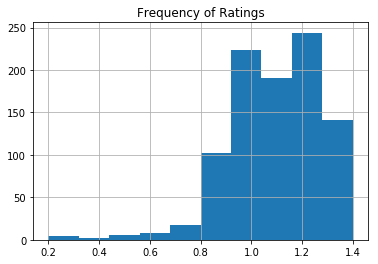

In [67]:
#histogram for the ratings
twitter_archive_master.new_rating.hist();
plt.title('Frequency of Ratings');

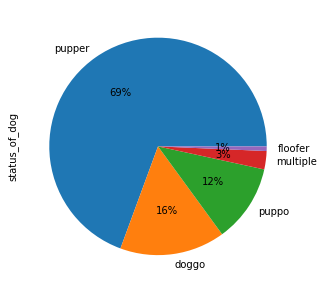

<Figure size 432x288 with 0 Axes>

In [68]:
#The status of dogs is based on the four kinds created in the attribute status
twitter_archive_master.status_of_dog.value_counts().plot(kind='pie', figsize = (5,5), autopct='%1.0f%%');
fig = plt.figure()
fig.savefig('status_of_dog.png')

Text(0.5, 1.0, 'favorites v retweet plot')

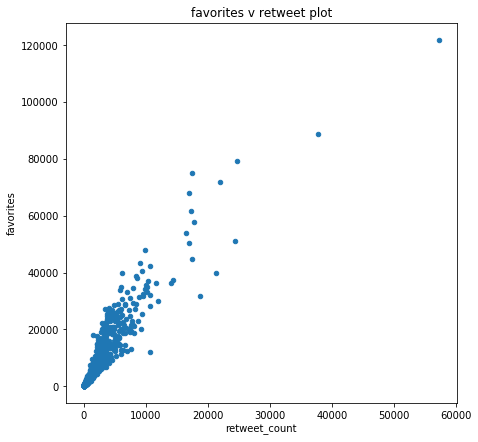

In [69]:
# read the Twitter API, and generated the retweet count and favorites from it.
twitter_archive_master.plot(kind = 'scatter', x = 'retweet_count', y = 'favorites', figsize = (7,7));
plt.title('favorites v retweet plot')

In [70]:
# correlation factor between the two attributes
twitter_archive_master.retweet_count.corr(twitter_archive_master.favorites)

0.9210639203982394

In [71]:
# grouping by different status of dogs, to see which ones have high rating and their retweet count. 
twitter_archive_master.groupby('status_of_dog')['new_rating','favorites','retweet_count'].mean().sort_values(by = ['new_rating'], ascending= False).head()

,new_rating,favorites,retweet_count
status_of_dog,,,
puppo,1.205882,16530.176471,4411.235294
doggo,1.152174,12521.086957,3784.739130
floofer,1.100000,15960.000000,3071.000000
pupper,1.092157,7138.196078,2082.813725
multiple,1.025000,17628.250000,5781.000000


In [72]:
#grouping by the dog breed, to see the highest rated. 
twitter_archive_master.groupby('true_prediction')['new_rating','favorites','retweet_count'].mean().sort_values(by = ['new_rating'], ascending= False).head(10)

,new_rating,favorites,retweet_count
true_prediction,,,
Saluki,1.300000,30188.000000,6251.500000
briard,1.233333,8763.000000,2630.333333
Tibetan_mastiff,1.225000,11170.250000,3691.250000
basset,1.216667,19611.500000,3613.500000
standard_schnauzer,1.200000,1858.000000,801.000000
silky_terrier,1.200000,6749.000000,1660.000000
Border_terrier,1.200000,14899.200000,3702.600000
Irish_water_spaniel,1.200000,21727.500000,5660.000000
Siberian_husky,1.200000,8807.727273,1967.636364


In [73]:
twitter_archive_master.groupby('true_prediction')['new_rating','favorites','retweet_count'].mean().sort_values(by = ['new_rating'], ascending= False).tail(10)[:4]

,new_rating,favorites,retweet_count
true_prediction,,,
Afghan_hound,0.8,15917.000000,5569.500000
soft-coated_wheaten_terrier,0.8,1056.666667,422.333333
black-and-tan_coonhound,0.7,100.000000,32.000000
Japanese_spaniel,0.5,1235.000000,398.000000


## Conclusions

<ul>
    <li> The ratings of the dogs are mostly between 0.8 to 1.4, with many ratings around 0.95-1.25. 
    <li> The most common tweeted dog is generally a pupper which constitute about 69%. While doggo and puppo were 16% and 12% respectively. Lease tweeted dogs were the floofers. Also the multiple category has around 3% of the dogs which were pupper and doggo.  
   <li> As expected the scatter plot between retweeted count and favorite count is a straight line. There is a high correlation factor between them. 
   <li> Based on the category of dog status, the mean rating of a puppo is the maximum. Similar numbers are seen in terms of mean of favorites and retweet counts. 
   <li> Saluzi and Tibetian Mastiff have the highest average rating, retweet count and favorite counts. On the other hand, Japanese Spaniel and black and tan coonhound are among the least tweeted (rated/retweeted) dogs. 